In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('/content/dataset_5.csv')
df.rename(columns={'Main Author ID': 'Author_ID'}, inplace=True)
df.rename(columns={'Two-Year Mean Citedness': 'Two-Year_Mean_Citedness'}, inplace=True)
df.rename(columns={'Country Code': 'Country_Code'}, inplace=True)
df.rename(columns={'Publication Year': 'Publication_Year'}, inplace=True)
df.rename(columns={'Co-Author ID': 'Co-Author_ID'}, inplace=True)
df.rename(columns={'Co-Author Counts': 'Co-Author_Counts'}, inplace=True)
df.rename(columns={'Avg Max Cited By Percentile Year': 'Citation'}, inplace=True)
df

,Author_ID,Author Name,H-Index,I-Index,Two-Year_Mean_Citedness,Institution,Country_Code,Publication_Year,Co-Author_ID,Co-Author Display Name,Co-Author_Counts,Sum Max Cited By Percentile Year,Citation
0,A5087966779,Nediljko Budiša,45,147,4.095238,University of Manitoba,CA,1999,A5051064583,Caroline Minks,1,96.2,96.2
1,A5087966779,Nediljko Budiša,45,147,4.095238,University of Manitoba,CA,1999,A5001788395,Nediljko Budiša,1,96.2,96.2
2,A5087966779,Nediljko Budiša,45,147,4.095238,University of Manitoba,CA,1999,A5063495689,Robert Huber,2,182.8,91.4
3,A5087966779,Nediljko Budiša,45,147,4.095238,University of Manitoba,CA,1999,A5065468362,Waltraud Wenger,2,182.8,91.4
4,A5087966779,Nediljko Budiša,45,147,4.095238,University of Manitoba,CA,1999,A5039607051,Luis Moröder,1,96.2,96.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13627,A5092704975,Aureliano Bonsembiante,0,0,0.000000,Institute for Research in Biomedicine,ES,2023,A5045739288,Luís Filipe Costa Póvoas,1,87.5,87.5
13628,A5092704975,Aureliano Bonsembiante,0,0,0.000000,Institute for Research in Biomedicine,ES,2023,A5023079125,Bastiaan de Potter,1,87.5,87.5
13629,A5092704975,Aureliano Bonsembiante,0,0,0.000000,Institute for Research in Biomedicine,ES,2023,A5027826203,A. Pons,1,87.5,87.5
13630,A5092704975,Aureliano Bonsembiante,0,0,0.000000,Institute for Research in Biomedicine,ES,2023,A5068884244,F. Xavier Gomis‐Rüth,1,87.5,87.5


In [72]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'df' is your dataframe and it has been loaded appropriately

# Generate a comprehensive list of unique IDs
all_unique_ids = pd.concat([df['Author_ID'], df['Co-Author_ID']]).unique()

# Map these IDs to a continuous range of integers for indexing
id_to_index = {id_: idx for idx, id_ in enumerate(all_unique_ids)}

# Create a new 'score' column by using 'Sum Max Cited By Percentile Year'
df['Score'] = df['Citation'].mean()

# Generate the Collaboration Matrix
# Initialize a matrix filled with zeros
collaboration_matrix = pd.DataFrame(0, index=all_unique_ids, columns=all_unique_ids)

# Populate the matrix with scores
for _, row in df.iterrows():
    author_id = row['Author_ID']
    co_author_id = row['Co-Author_ID']
    score = row['Score']
    collaboration_matrix.at[author_id, co_author_id] = score
    collaboration_matrix.at[co_author_id, author_id] = score  # Assuming symmetric relationships

# Apply SVD
svd = TruncatedSVD(n_components=50)
matrix_reduced = svd.fit_transform(collaboration_matrix)

# Calculate cosine similarity
similarity_matrix = cosine_similarity(matrix_reduced)

# Function to recommend co-authors for a given author_id
def recommend_co_authors(author_id, similarity_matrix, id_to_index, all_unique_ids):
    author_idx = id_to_index[author_id]
    similarity_scores = list(enumerate(similarity_matrix[author_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    recommended_authors = [(all_unique_ids[i], score) for i, score in similarity_scores[1:]]
    return recommended_authors

# Example usage
your_author_id = 'A5077915220'
recommendations = recommend_co_authors(your_author_id, similarity_matrix, id_to_index, all_unique_ids)
print(len(recommendations))
print(f"Recommended Co-Authors for Author ID {your_author_id} are:")
for co_author, score in recommendations:
    print(f"Author ID: {co_author}, Similarity Score: {score}")


Streaming output truncated to the last 5000 lines.
Author ID: A5081298813, Similarity Score: 0.07122556284479657
Author ID: A5043993193, Similarity Score: 0.07122556284479657
Author ID: A5064640228, Similarity Score: 0.07122556284479657
Author ID: A5009442458, Similarity Score: 0.07122556284479657
Author ID: A5067217335, Similarity Score: 0.07122556284479657
Author ID: A5053973876, Similarity Score: 0.07122556284479657
Author ID: A5017354438, Similarity Score: 0.07122556284479657
Author ID: A5018118483, Similarity Score: 0.07122556284479657
Author ID: A5021965815, Similarity Score: 0.07099667065722229
Author ID: A5054089040, Similarity Score: 0.07099141082667192
Author ID: A5059105813, Similarity Score: 0.07098608106868651
Author ID: A5060666092, Similarity Score: 0.07048276043231722
Author ID: A5006514319, Similarity Score: 0.07023809018811177
Author ID: A5058210369, Similarity Score: 0.06977829658537206
Author ID: A5047712389, Similarity Score: 0.06977829652032791
Author ID: A5035095

In [73]:
existing_collaborations=[]
for i in recommendations:
  if df[(df['Author_ID'] == your_author_id) & (df['Co-Author_ID'] == i[0])].any(axis=None):
    existing_collaborations.append((your_author_id, i[0], i[1]))
print(len(existing_collaborations))
for existing_collaboration in existing_collaborations:
    print(f"Author ID: {existing_collaboration[0]}, Co-Author ID: {existing_collaboration[1]}, Similarity Score: {existing_collaboration[2]}")

88
Author ID: A5077915220, Co-Author ID: A5091577627, Similarity Score: 0.7439129595811441
Author ID: A5077915220, Co-Author ID: A5061659558, Similarity Score: 0.7014047815225514
Author ID: A5077915220, Co-Author ID: A5085495473, Similarity Score: 0.6927237447928861
Author ID: A5077915220, Co-Author ID: A5041967373, Similarity Score: 0.6923234664655956
Author ID: A5077915220, Co-Author ID: A5044702420, Similarity Score: 0.6763266272477997
Author ID: A5077915220, Co-Author ID: A5043447862, Similarity Score: 0.676161988536138
Author ID: A5077915220, Co-Author ID: A5071083825, Similarity Score: 0.5716240504713401
Author ID: A5077915220, Co-Author ID: A5013562042, Similarity Score: 0.5293144563208487
Author ID: A5077915220, Co-Author ID: A5072383579, Similarity Score: 0.4851449147829539
Author ID: A5077915220, Co-Author ID: A5068079731, Similarity Score: 0.48514491478124555
Author ID: A5077915220, Co-Author ID: A5091733116, Similarity Score: 0.4658076420077903
Author ID: A5077915220, Co-Au

In [118]:
# Define a function to calculate the average of the Avg Max Cited By Percentile Year for each author pair
dataset = pd.read_csv('/content/dataset_5.csv')
def calculate_avg_max_cited_by_percentile_year(author_pairs, dataset):
    avg_max_cited_by_percentile_year_list = []

    for main_author_id, co_author_id in author_pairs:
        # Filter dataset for the specific main author and co-author pair
        filtered_dataset = dataset[((dataset['Main Author ID'] == main_author_id) &
                                    (dataset['Co-Author ID'] == co_author_id)) |
                                   ((dataset['Main Author ID'] == co_author_id) &
                                    (dataset['Co-Author ID'] == main_author_id))]

        # Calculate the average of the Avg Max Cited By Percentile Year for the filtered dataset
        avg_max_cited_by_percentile_year = filtered_dataset['Avg Max Cited By Percentile Year'].mean()
        # Append the result to the list along with the author pair
        avg_max_cited_by_percentile_year_list.append((main_author_id, co_author_id, avg_max_cited_by_percentile_year))

    return avg_max_cited_by_percentile_year_list

author_pairs = []
for i in existing_collaborations:
  author_pairs.append((i[0],i[1]))
# Execute the function with the author_pairs and the loaded dataset
author_pairs_avg_max_cited_by_percentile_year = calculate_avg_max_cited_by_percentile_year(author_pairs, dataset)

# Display the results
avg_max_cited_by_percentile_values = [item[2] for item in author_pairs_avg_max_cited_by_percentile_year]

# Normalize the values to the range 0 to 1
min_value = min(avg_max_cited_by_percentile_values)
max_value = max(avg_max_cited_by_percentile_values)

normalized_values = [(value - min_value) / (max_value - min_value) for value in avg_max_cited_by_percentile_values]

# Combine the normalized values with the author pairs
similarity_scores_svd = [(pair[0], pair[1], normalized) for pair, normalized in zip(author_pairs, normalized_values)]

similarity_scores_svd


[('A5077915220', 'A5091577627', 0.8459072978303749),
 ('A5077915220', 'A5061659558', 0.9792899408284023),
 ('A5077915220', 'A5085495473', 0.98422090729783),
 ('A5077915220', 'A5041967373', 0.9901380670611442),
 ('A5077915220', 'A5044702420', 0.9930966469428008),
 ('A5077915220', 'A5043447862', 0.98422090729783),
 ('A5077915220', 'A5071083825', 0.985207100591716),
 ('A5077915220', 'A5013562042', 0.9726331360946742),
 ('A5077915220', 'A5072383579', 0.9940828402366864),
 ('A5077915220', 'A5068079731', 0.9940828402366864),
 ('A5077915220', 'A5091733116', 0.8254437869822483),
 ('A5077915220', 'A5044788133', 0.9940828402366864),
 ('A5077915220', 'A5035651490', 0.9585798816568045),
 ('A5077915220', 'A5014864814', 0.9585798816568045),
 ('A5077915220', 'A5065595809', 0.6642011834319528),
 ('A5077915220', 'A5013630294', 0.6642011834319528),
 ('A5077915220', 'A5045248659', 0.6642011834319528),
 ('A5077915220', 'A5072324949', 0.6642011834319528),
 ('A5077915220', 'A5003365197', 0.86301775147929),


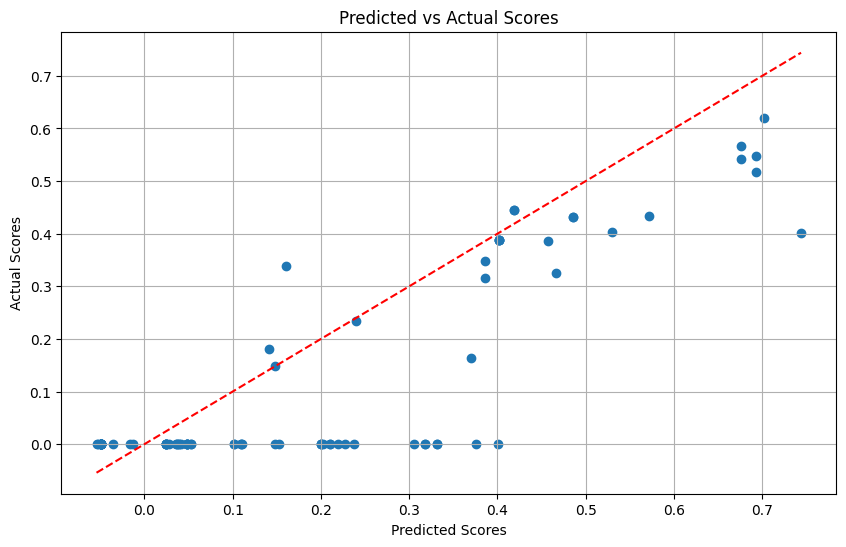

In [122]:
import matplotlib.pyplot as plt

# Predicted scores
predicted_similarities = []
for i in existing_collaborations:
  predicted_similarities.append(i[2])

# Actual scores
actual_similarities = []
for i in similarity_scores_svd:
  actual_similarities.append(similarity_scores_svd[i])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.plot([min(predicted_similarities + actual_similarities), max(predicted_similarities + actual_similarities)], [min(predicted_similarities + actual_similarities), max(predicted_similarities + actual_similarities)], color='red', linestyle='--')

plt.scatter(predicted_similarities,actual_similarities)
plt.title('Predicted vs Actual Scores')
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')

plt.grid(True)
plt.show()

In [123]:
# Since the user requested a change in the approach, and a new file is mentioned but seems to be the same as previously uploaded,
# we will proceed with the provided instructions but using the already loaded dataset, changing the score calculation as requested.

# Load the new dataset for updated processing
df_updated = pd.read_csv('/content/dataset_5.csv')

# Correct preprocessing: Use 'Avg Max Cited By Percentile Year' directly as the score
df_updated['Score'] = df_updated['Avg Max Cited By Percentile Year']

from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Creating a unique list of authors and co-authors
unique_authors = pd.concat([df_updated['Main Author ID'], df_updated['Co-Author ID']]).unique()

# Mapping author IDs to matrix indices
author_to_idx = {author_id: idx for idx, author_id in enumerate(unique_authors)}
idx_to_author = {idx: author_id for author_id, idx in author_to_idx.items()}

# Building the interaction matrix
rows = df_updated['Main Author ID'].map(author_to_idx)
cols = df_updated['Co-Author ID'].map(author_to_idx)
data = np.ones(len(df_updated))

interaction_matrix = csr_matrix((data, (rows, cols)), shape=(len(unique_authors), len(unique_authors)))

# Applying SVD
svd = TruncatedSVD(n_components=100, random_state=42)
interaction_matrix_reduced = svd.fit_transform(interaction_matrix)

# Calculating similarity matrix
similarity_matrix_svd = cosine_similarity(interaction_matrix_reduced)

# Function to fetch similarity score for a specific pair
def get_svd_similarity_score(author_id_1, author_id_2, similarity_matrix, author_to_idx_map):
    idx_1 = author_to_idx_map[author_id_1]
    idx_2 = author_to_idx_map[author_id_2]
    return similarity_matrix[idx_1, idx_2]

# Specified author pairs
author_pairs = []
for i in existing_collaborations:
  author_pairs.append((i[0],i[1]))

# Calculate new similarity scores for each pair
similarity_scores_svd = {}
for pair in author_pairs:
    score = get_svd_similarity_score(pair[0], pair[1], similarity_matrix_svd, author_to_idx)
    similarity_scores_svd[pair] = score

similarity_scores_svd
non_zero_similarity_scores_svd = {}
non_zero_author_pairs = []  # This list will hold author-co-author pairs with non-zero similarity scores

for pair in author_pairs:
    score = get_svd_similarity_score(pair[0], pair[1], similarity_matrix_svd, author_to_idx)
    if score != 0:  # Check if the similarity score is non-zero
        non_zero_similarity_scores_svd[pair] = score
        non_zero_author_pairs.append(pair)  # Append the pair to the list

# Display the filtered similarity scores


# If you also need to see the list of non-zero author pairs, you can display it as well

non_zero_similarity_scores_svd


{('A5077915220', 'A5091577627'): 0.40106348525783175,
 ('A5077915220', 'A5061659558'): 0.619150454050385,
 ('A5077915220', 'A5085495473'): 0.5164375673280902,
 ('A5077915220', 'A5041967373'): 0.5469856915173008,
 ('A5077915220', 'A5044702420'): 0.5661427253044692,
 ('A5077915220', 'A5043447862'): 0.5420537607937044,
 ('A5077915220', 'A5071083825'): 0.4336858457407693,
 ('A5077915220', 'A5013562042'): 0.40243665977940757,
 ('A5077915220', 'A5072383579'): 0.4326164355731523,
 ('A5077915220', 'A5068079731'): 0.4326164355713402,
 ('A5077915220', 'A5091733116'): 0.3248155316782136,
 ('A5077915220', 'A5044788133'): 0.3853262075346941,
 ('A5077915220', 'A5035651490'): 0.44555394515774094,
 ('A5077915220', 'A5014864814'): 0.44555394515819957,
 ('A5077915220', 'A5065595809'): 0.3872506871019902,
 ('A5077915220', 'A5013630294'): 0.38725068756277653,
 ('A5077915220', 'A5045248659'): 0.3872506903291126,
 ('A5077915220', 'A5072324949'): 0.3872506900787254,
 ('A5077915220', 'A5018885594'): 0.3152191

In [114]:
# Initialize the new list for filtered collaborations
existing_collaborations1 = []

# Iterate through existing collaborations
for collaboration in existing_collaborations:
    # Extract the author and co-author IDs from the collaboration
    author_id, co_author_id, _ = collaboration

    # Check if the (author_id, co_author_id) tuple is a key in non_zero_similarity_scores_svd
    if (author_id, co_author_id) in non_zero_similarity_scores_svd:
        # If the pair is in non_zero_similarity_scores_svd, append it to the new list
        existing_collaborations1.append(collaboration)

# Now, existing_collaborations1 contains only those collaborations present in non_zero_similarity_scores_svd
# You can print or use existing_collaborations1 as needed
for collaboration in existing_collaborations1:
    print(f"Author ID: {collaboration[0]}, Co-Author ID: {collaboration[1]}, Similarity Score: {collaboration[2]}")


Author ID: A5077915220, Co-Author ID: A5091577627, Similarity Score: 0.7439129595811441
Author ID: A5077915220, Co-Author ID: A5061659558, Similarity Score: 0.7014047815225514
Author ID: A5077915220, Co-Author ID: A5085495473, Similarity Score: 0.6927237447928861
Author ID: A5077915220, Co-Author ID: A5041967373, Similarity Score: 0.6923234664655956
Author ID: A5077915220, Co-Author ID: A5044702420, Similarity Score: 0.6763266272477997
Author ID: A5077915220, Co-Author ID: A5043447862, Similarity Score: 0.676161988536138
Author ID: A5077915220, Co-Author ID: A5071083825, Similarity Score: 0.5716240504713401
Author ID: A5077915220, Co-Author ID: A5013562042, Similarity Score: 0.5293144563208487
Author ID: A5077915220, Co-Author ID: A5072383579, Similarity Score: 0.4851449147829539
Author ID: A5077915220, Co-Author ID: A5068079731, Similarity Score: 0.48514491478124555
Author ID: A5077915220, Co-Author ID: A5091733116, Similarity Score: 0.4658076420077903
Author ID: A5077915220, Co-Autho

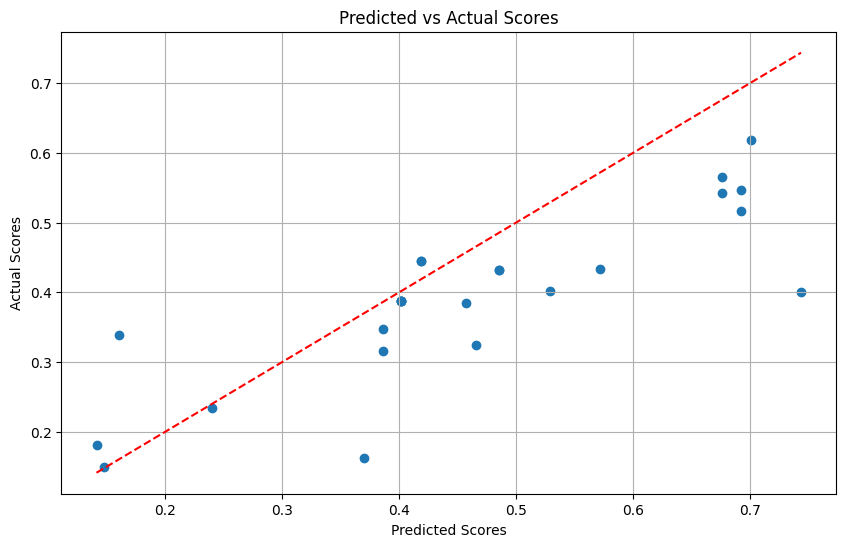

In [124]:
import matplotlib.pyplot as plt

# Predicted scores
predicted_similarities = []
for i in existing_collaborations1:
  predicted_similarities.append(i[2])

# Actual scores
actual_similarities = []
for i in non_zero_similarity_scores_svd:
  actual_similarities.append(non_zero_similarity_scores_svd[i])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.plot([min(predicted_similarities + actual_similarities), max(predicted_similarities + actual_similarities)], [min(predicted_similarities + actual_similarities), max(predicted_similarities + actual_similarities)], color='red', linestyle='--')

plt.scatter(predicted_similarities,actual_similarities)
plt.title('Predicted vs Actual Scores')
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')

plt.grid(True)
plt.show()